# Fraud Detection in Financial Transactions

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from matplotlib import pyplot as plt

## Data preprocessing

In [2]:
data = pd.read_csv('card_transdata.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [26]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [27]:
X = X.astype(float)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

In [30]:
RFC = RandomForestClassifier(random_state = 12)
RFC = RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

## Evaluating the model

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[182436      0]
 [     3  17561]]


In [32]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.999985


In [33]:
accuracies = cross_val_score(estimator = RFC, X = X_train, y = y_train, cv = StratifiedKFold(n_splits= 5))
print(f"Average Accuracy: {accuracies.mean()*100: .2f}%")
print(f"Standard Deviation of Accuracy: {accuracies.std()*100: .2f}%")

Average Accuracy:  100.00%
Standard Deviation of Accuracy:  0.00%


In [34]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.9999145907473309


In [35]:
roc = roc_auc_score(y_test, y_pred)
print(roc)

0.9999145980414484


## Generating the ROC Curve

In [36]:
y_score = RFC.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

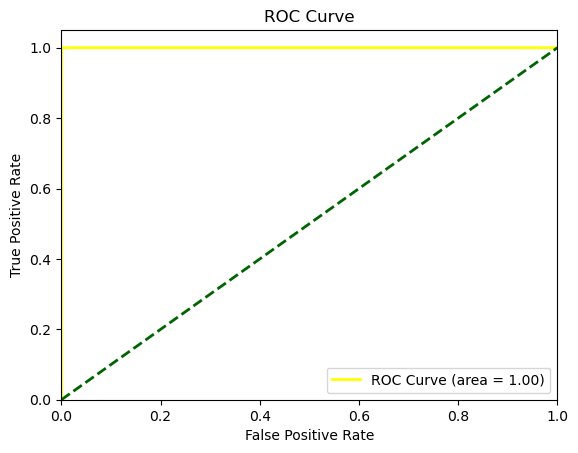

In [37]:
plt.figure()
plt.plot(fpr, tpr, color = 'yellow', lw = 2, label = f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'darkgreen', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()